In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look nicer
sns.set(style="whitegrid")
%matplotlib inline


In [2]:
data = pd.read_csv("sba_loans_cleaned.csv", parse_dates=['AsOfDate','ApprovalDate','FirstDisbursementDate','PaidinFullDate','ChargeoffDate'])
data.head()


,AsOfDate,Program,BorrName,BorrCity,BorrState,BorrZip,BankName,BankFDICNumber,BankCity,BankState,...,BusinessType,BusinessAge,LoanStatus,PaidinFullDate,ChargeoffDate,GrossChargeoffAmount,RevolverStatus,JobsSupported,CollateralInd,SoldSecondMarketInd
0,2025-06-30,7A,Tian Shan International LLC,HOUSTON,TX,77006,"Golden Bank, National Association",26223.0,HOUSTON,TX,...,CORPORATION,Unanswered,PIF,2024-01-31,NaT,0.0,0,4.0,Y,N
1,2025-06-30,7A,Tideline Marine,JACKSONVILLE,NC,28540,First Bank,15019.0,SOUTHERN PINES,NC,...,CORPORATION,Existing or more than 2 years old,EXEMPT,NaT,NaT,0.0,0,7.0,Y,Y
2,2025-06-30,7A,CLARE CAPITAL PARTNERS INC.,HACKETTSTOWN,NJ,7840,"Citizens Bank, National Association",57957.0,PROVIDENCE,RI,...,CORPORATION,Existing or more than 2 years old,CANCLD,NaT,NaT,0.0,1,7.0,Y,N
3,2025-06-30,7A,ADS Steel Detailing LLC,ALBUQUERQUE,NM,87113,First Bank,15019.0,SOUTHERN PINES,NC,...,CORPORATION,Change of Ownership,EXEMPT,NaT,NaT,0.0,0,7.0,Y,Y
4,2025-06-30,7A,MID-KAM CRUSHING LLC,Cleveland,OH,44105,The Huntington National Bank,6560.0,COLUMBUS,OH,...,CORPORATION,Existing or more than 2 years old,CANCLD,NaT,NaT,0.0,0,4.0,N,N


In [3]:
data[['GrossApproval','SBAGuaranteedApproval','InitialInterestRate','TerminMonths','JobsSupported','GrossChargeoffAmount']].describe()


,GrossApproval,SBAGuaranteedApproval,InitialInterestRate,TerminMonths,JobsSupported,GrossChargeoffAmount
count,3.307030e+05,3.307030e+05,330703.000000,330703.000000,330703.000000,3.307030e+05
mean,5.172092e+05,3.913103e+05,8.656112,138.618368,10.576638,1.691569e+03
std,8.566230e+05,6.650951e+05,2.815695,70.717080,18.887934,3.788290e+04
min,1.000000e+03,5.000000e+02,0.000000,0.000000,0.000000,0.000000e+00
25%,5.000000e+04,3.750000e+04,6.000000,120.000000,2.000000,0.000000e+00
50%,1.889000e+05,1.275000e+05,9.000000,120.000000,5.000000,0.000000e+00
75%,5.000000e+05,3.851250e+05,10.750000,120.000000,12.000000,0.000000e+00
max,5.000000e+06,4.500000e+06,16.500000,420.000000,550.000000,4.633000e+06


In [4]:
categorical_cols = ['LoanStatus','BusinessType','BusinessAge','BorrState','ProjectState','BankName','NAICSDescription']
for col in categorical_cols:
    print(data[col].value_counts().head(10))
    print("----------------------------------------------------")


LoanStatus
EXEMPT    218420
PIF        46624
CANCLD     35398
COMMIT     26473
CHGOFF      3788
Name: count, dtype: int64
----------------------------------------------------
BusinessType
CORPORATION    310148
INDIVIDUAL      16815
PARTNERSHIP      3672
                   68
Name: count, dtype: int64
----------------------------------------------------
BusinessAge
Existing or more than 2 years old         183529
New Business or 2 years or less            55391
Startup, Loan Funds will Open Business     53730
Change of Ownership                        33760
Unanswered                                  4293
Name: count, dtype: int64
----------------------------------------------------
BorrState
CA    38140
TX    24909
FL    24151
NY    20356
OH    19542
MI    13183
IL    11499
PA    11212
NJ    11167
GA     9928
Name: count, dtype: int64
----------------------------------------------------
ProjectState
CA    38154
TX    24885
FL    24147
NY    20351
OH    19546
MI    13185
IL    11507
PA 

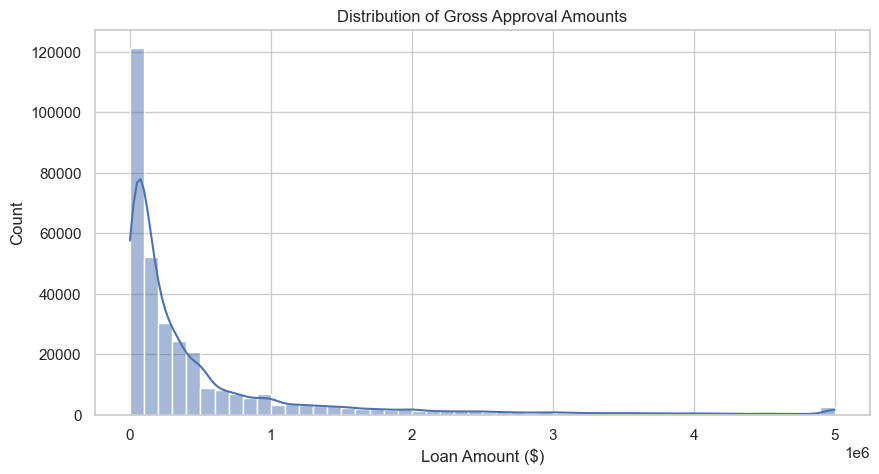

In [5]:
plt.figure(figsize=(10,5))
sns.histplot(data['GrossApproval'], bins=50, kde=True)
plt.title("Distribution of Gross Approval Amounts")
plt.xlabel("Loan Amount ($)")
plt.ylabel("Count")
plt.show()


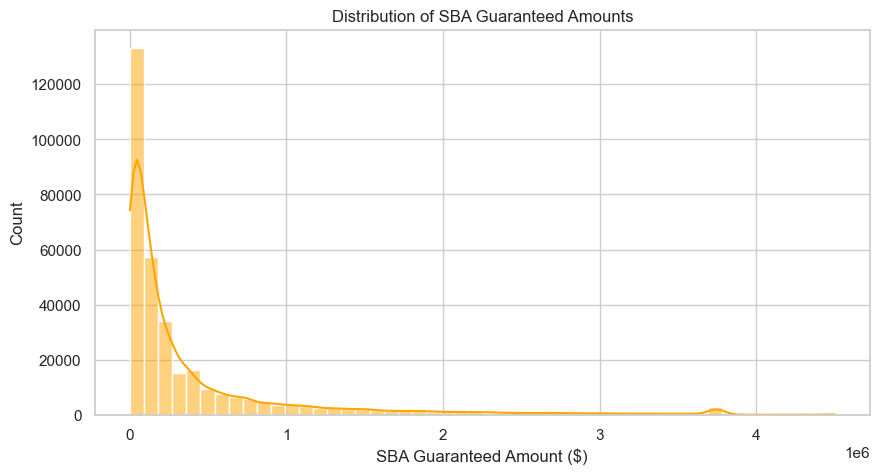

In [6]:
plt.figure(figsize=(10,5))
sns.histplot(data['SBAGuaranteedApproval'], bins=50, kde=True, color='orange')
plt.title("Distribution of SBA Guaranteed Amounts")
plt.xlabel("SBA Guaranteed Amount ($)")
plt.ylabel("Count")
plt.show()


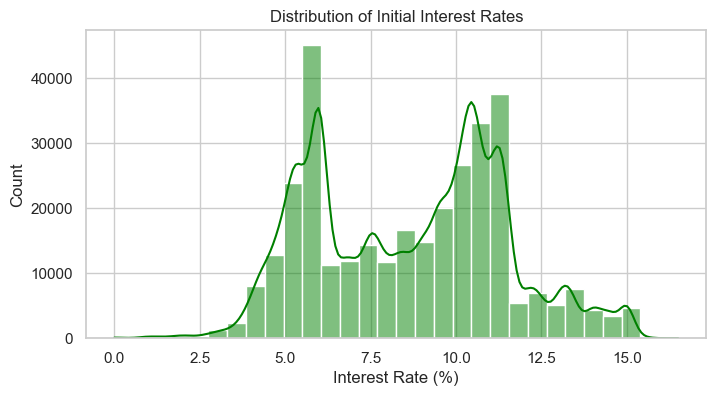

In [7]:
plt.figure(figsize=(8,4))
sns.histplot(data['InitialInterestRate'], bins=30, kde=True, color='green')
plt.title("Distribution of Initial Interest Rates")
plt.xlabel("Interest Rate (%)")
plt.show()


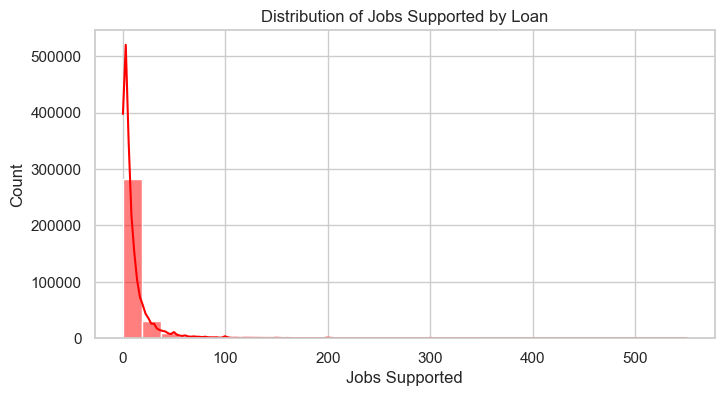

In [8]:
plt.figure(figsize=(8,4))
sns.histplot(data['JobsSupported'], bins=30, kde=True, color='red')
plt.title("Distribution of Jobs Supported by Loan")
plt.xlabel("Jobs Supported")
plt.show()


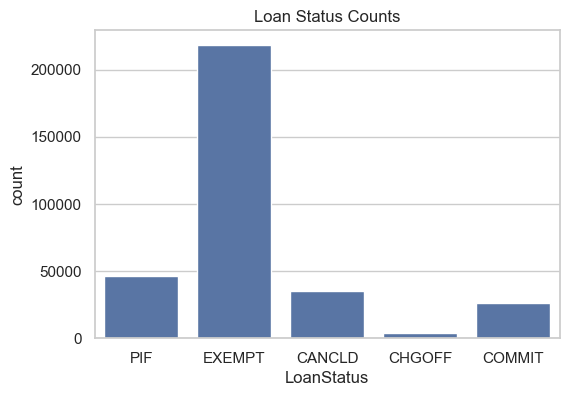

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='LoanStatus', data=data)
plt.title("Loan Status Counts")
plt.show()


C:\Users\GILL\AppData\Local\Temp\ipykernel_29016\2477463362.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette='viridis')


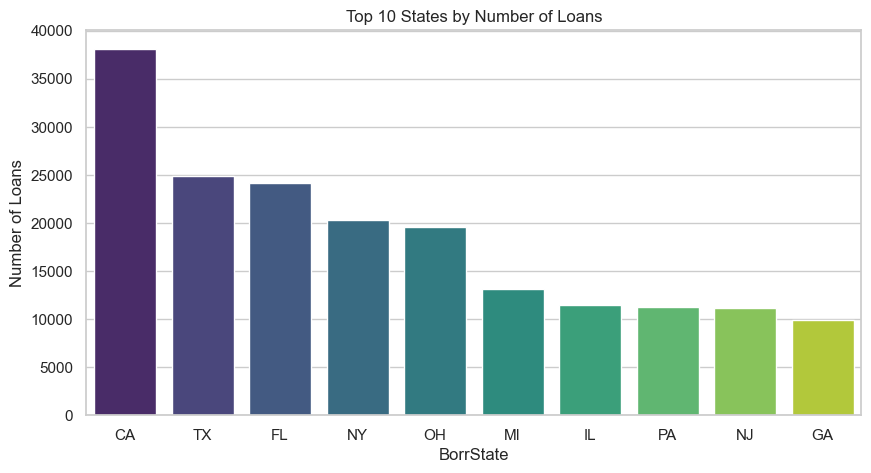

In [10]:
top_states = data['BorrState'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_states.index, y=top_states.values, palette='viridis')
plt.title("Top 10 States by Number of Loans")
plt.ylabel("Number of Loans")
plt.show()


C:\Users\GILL\AppData\Local\Temp\ipykernel_29016\3715881505.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_industries.values, y=top_industries.index, palette='magma')


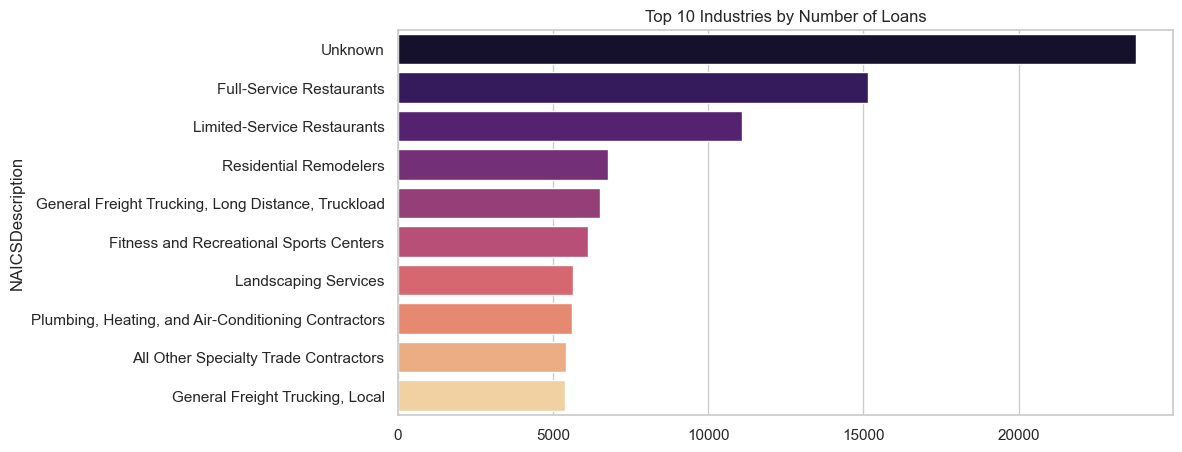

In [11]:
top_industries = data['NAICSDescription'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_industries.values, y=top_industries.index, palette='magma')
plt.title("Top 10 Industries by Number of Loans")
plt.show()


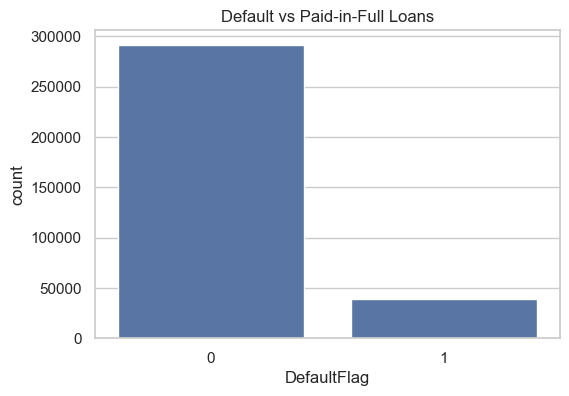

In [12]:

data['DefaultFlag'] = data['LoanStatus'].apply(lambda x: 1 if x in ['CANCLD','CHGOFF'] else 0)


plt.figure(figsize=(6,4))
sns.countplot(x='DefaultFlag', data=data)
plt.title("Default vs Paid-in-Full Loans")
plt.show()
